In [65]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [3]:
bold = np.loadtxt('../data/50003_timeseries.txt')
bold_bin = np.zeros(bold.shape)
bold_bin[np.where(bold>=0)] = 1
bold_bin[np.where(bold<0)] = -1

In [4]:
n_rois = bold_bin.shape[1]
n_timesteps = bold_bin.shape[0]
beta = 1
J = np.ones((n_rois, n_rois))

In [10]:
fc = 1/n_timesteps * bold_bin.T @ bold_bin

In [116]:
class IsingSimulation:
    
    def __init__(self, n_rois, beta, coupling_mat = False, J=None):
        self.N = n_rois
        self.beta = beta
        if not coupling_mat:
            J = np.random.uniform(0, 1, size=(n_rois, n_rois))
            J = (J + J.T)/2 # making it symmetric
            np.fill_diagonal(J, 1)
        self.J = J
        self.state = 2*np.random.randint(2, size=(n_rois))-1
#         self.state = np.ones(shape = (n_rois))
        return


    def step(self, update_state = True, state = None):
        if update_state:
            state = self.state[:]
        energy_flips = 0
        random_flips = 0
        for i in range(self.N):
            # calculating delH
            H_i = 0
            H_i = self.J[i, :] @ state.T 
            H_i -= self.J[i, i] * state[i] # removing self coupling term
#             print(state[i], H_i)
            cost =  2 * state[i] * H_i
            if cost < 0:
                state[i] *= -1
                energy_flips +=1
            elif rand() < np.exp(-cost*self.beta):
                state[i] *= -1
                random_flips += 1
        if update_state:
            self.state = state
        return state, energy_flips, random_flips
    
    def calcEnergy(self):
        H = 0
        H = -self.state @ self.J @ self.state.T
        return H/2
    
    def calcMag(self):
        mag = np.sum(self.state)
        return mag
    
    def getTimeseries(self, n_timesteps):
        time_series = np.zeros((n_timesteps, self.N))
        state = self.state[:]
        for i in range(n_timesteps):
            state, _, _ = self.step(False, state)
            time_series[i] = state
        print(np.sum(time_series))
        fc = time_series.T @ time_series 
        return time_series, fc
    
    def run(self, steps, n_timesteps, calc_corr=False, fc=None, eqSteps=1000):
        E = M = corr = []
        for i in range(eqSteps):
            sim.step()
            
        for i in range(steps):
            if calc_corr and i%calc_corr == 0:
                time_series, sim_fc = sim.getTimeseries(n_timesteps)
                c = np.corrcoef(np.triu(fc).flatten(), np.triu(sim_fc).flatten())[0, 1]
                corr.append(c)
            sim.step()           # Monte Carlo moves
            E.append(sim.calcEnergy())
            M.append(sim.calcMag())
        if calc_corr:
            return E, M, corr
        return E, M

In [118]:
beta = 1
sim = IsingSimulation(n_rois, beta, coupling_mat = True, J=J)
_, sim_fc = sim.getTimeseries(n_timesteps)
sample_fc = sim_fc
corr = []
for i in range(10):
    _, sim_fc = sim.getTimeseries(n_timesteps)
    c = np.corrcoef(np.triu(sample_fc).flatten(), np.triu(sim_fc).flatten())[0, 1]
    corr.append(c)

13456.0
13456.0
13456.0
13456.0
13456.0
13456.0
13456.0
13456.0
13456.0
13456.0
13456.0


In [115]:
corr

[0.16026635349682455,
 0.059374609257838856,
 0.05078761585160586,
 0.06339710645728928,
 0.03794625041800241,
 0.04775089120697807,
 0.05474640432581936,
 0.04628519551795321,
 0.04853559904888161,
 0.03862390829212129]

In [100]:
eqSteps = 1000   #  number of MC sweeps for equilibration
# mcSteps = 2**9       #  number of MC sweeps for calculation

In [105]:
E = []
J = np.ones((n_rois, n_rois))
beta = 0.001
sim = IsingSimulation(n_rois, beta, coupling_mat = True, J=J)
n_timesteps = 116
M = []
corr = []
flips = {
    'r': [], 
    'e': []
}
for i in range(eqSteps):
    _, e_flips, r_flips =  sim.step()           # Monte Carlo moves
    flips['r'].append(r_flips)
    flips['e'].append(e_flips)
    if i%1000 == 0:
        print(i, e_flips, r_flips)
        time_series, sim_fc = sim.getTimeseries(n_timesteps)
        c = np.corrcoef(np.triu(fc).flatten(), np.triu(sim_fc).flatten())[0, 1]
        corr.append(c)
#     _, ene, rand =  sim.step()           # Monte Carlo moves
    E.append(sim.calcEnergy())
    M.append(sim.calcMag())


0 50 58


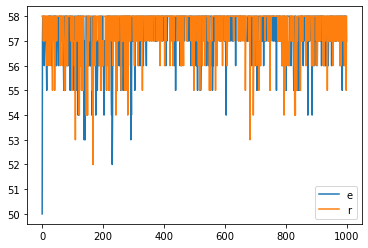

In [106]:
plt.plot(flips['e'], label='e')
plt.plot(flips['r'], label='r')
plt.legend()

In [75]:
flips['e']

[5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


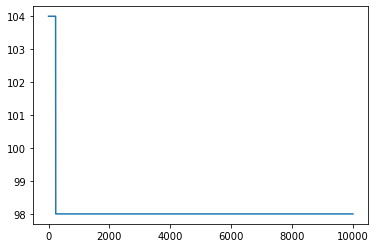

In [68]:
plt.plot(M)

In [90]:
np.triu(fc).flatten().shape, np.triu(sim_fc).flatten().shape

((13456,), (13456,))

array([1.96, 0.36, 0.28, ..., 0.  , 0.  , 1.96])